In [1]:
from IPython.display import HTML
HTML('''
<script>
code_show=false;
function code_toggle(){
    if(code_show){$('.prompt, .input, .output_stderr, .output_error').hide();}
    else{$('.input, .prompt, .output_stderr, .output_error').show();}
    code_show=!code_show;
}
function initialize(){
    document.body.style.fontFamily='Palatino';
    var output=$('.output_subarea.output_text.output_stream.output_stdout');
    $.merge(output,$('.output_subarea.output_text.output_result'));
    for(var i=0;i<output.length;i++)for(var j=0;j<output[i].children.length;j++)
        output[i].children[j].style.fontFamily='Palatino';
    code_toggle();
}
$(document).ready(initialize);
</script>
Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.
''')

### 7.4.6 Exercices
#### Exercice 7.
Soit la fonction de boucle ouverte d'un processus: $$G(p)={\frac {1}{(1+0.5p)(1+5p)(1+20p)}}$$

On demande de déterminer *graphiquement* le correcteur PID dont le but est d’annuler l’erreur
de position et de garantir une erreur de vitesse de 33%, tout en assurant une marge de phase
de 45°.

##### Solution:

L’annulation de l’erreur de position sera assurée par le pole à l’origine du correcteur.

Fixer l’erreur de vitesse à 33% impose le gain : $\varepsilon_v={\frac{1}{K_P}}=0.33$ d'où $K_P=3$.

Nous choisirons $\tau_I=20$ s pour supprimer le pôle dominant du processus.

Et $\tau_D=5$ s pour compenser la deuxième constante de temps du process …

On trace le système ainsi corrigé pour vérifier si la marge de phase est bien correcte :

In [2]:
from IPython.display import display, Markdown

from control.matlab import *  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of Gramme

In [3]:
# Fonction de transfert en boucle ouverte
G1 = tf(1, [0.5, 1])
G2 = tf(1, [5, 1])
G3 = tf(1, [20, 1])
G = G1*G2*G3  # G de l'énoncé 

MP = 45 # Marge de phase réclamée
Kp = 3
tI = 20
tD = 5

Le système ainsi corrigé présente une marge de phase de 43.88° et une marge de gain de inf dB.


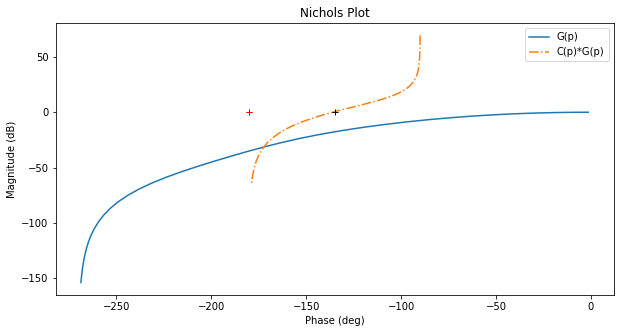

In [4]:
Corr = Kp*tf([tD, 1],[1, 0])*tf([tI, 1], 1)

fig = plt.figure("Nichols",figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, grid = False, labels=['G(p)'], NameOfFigure = "Nichols")
rlf.nichols(Corr*G, grid = False, labels=['C(p)*G(p)'], NameOfFigure = "Nichols", linestyle = '-.')

ax.plot(-180+MP, 0,'k+'); # Ajout du repère (+) par lequel on est censé passer

gm, pm, wg, wp = margin(Corr*G) # Extrait la marge de gain (Gm) et de phase (Pm)
print(f"Le système ainsi corrigé présente une marge de phase de {pm:.2f}° et une marge de gain de {gm:.2f} dB.")

Si la marge est trop petite, il faut … $\tau_D$

Si la marge est trop grande, il faut … $\tau_D$

Le système corrigé avec $\tau_D=3$ s présente une marge de phase de 48.62° et une marge de gain de inf dB.

Le système corrigé avec $\tau_D=8$ s présente une marge de phase de 37.16° et une marge de gain de inf dB.

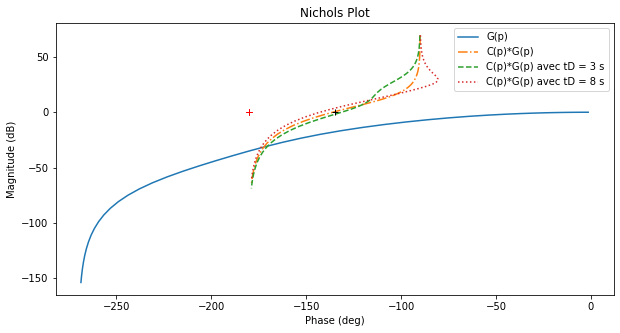

In [5]:
Corr1 = Kp*tf([3, 1],[1, 0])*tf([tI, 1], 1)
Corr2 = Kp*tf([8, 1],[1, 0])*tf([tI, 1], 1)

fig = plt.figure("Nichols",figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, grid = False, labels=['G(p)'], NameOfFigure = "Nichols")
rlf.nichols(Corr*G, grid = False, labels=['C(p)*G(p)'], NameOfFigure = "Nichols", linestyle = '-.')
rlf.nichols(Corr1*G, grid = False, labels=['C(p)*G(p) avec tD = 3 s'], NameOfFigure = "Nichols", linestyle = '--')
rlf.nichols(Corr2*G, grid = False, labels=['C(p)*G(p) avec tD = 8 s'], NameOfFigure = "Nichols", linestyle = ':')

ax.plot(-180+MP, 0,'k+'); # Ajout du repère (+) par lequel on est censé passer

gm, pm, wg, wp = margin(Corr1*G) # Extrait la marge de gain (Gm) et de phase (Pm)
display(Markdown(rf"Le système corrigé avec $\tau_D=3$ s présente une marge de phase de {pm:.2f}° et une marge de gain de {gm:.2f} dB."))
gm, pm, wg, wp = margin(Corr2*G) # Extrait la marge de gain (Gm) et de phase (Pm)
display(Markdown(rf"Le système corrigé avec $\tau_D=8$ s présente une marge de phase de {pm:.2f}° et une marge de gain de {gm:.2f} dB."))

Si l’on souhaite dimensionner le correcteur D par placement fréquentiel:

Pour placer $\tau_D$, nous partons du fait que, pour $\omega>\frac{1}{\tau_D}$,
le terme $(1+\tau_D*p)$ produit une augmentation du module et un déphasage qui lui est de +90°.

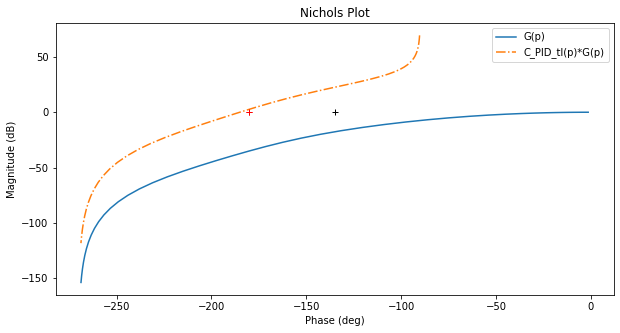

In [6]:
tI = 20
Corr_PID_tI = Kp*tf([tI, 1], [1, 0])

fig = plt.figure("Nichols",figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, grid = False, labels=['G(p)'], NameOfFigure = "Nichols")
rlf.nichols(Corr_PID_tI*G, grid = False, labels=['C_PID_tI(p)*G(p)'], NameOfFigure = "Nichols", linestyle = '-.')

ax.plot(-180+MP, 0,'k+'); # Ajout du repère (+) par lequel on est censé passer

Sur la tracé de : $\frac{3}{p}(1+20p)\frac{1}{(1+0.5p)(1+5p)(1+20p)}=\frac{3}{p}\frac{1}{(1+0.5p)(1+5p)}$ (trait mixte), on cherche le point dont la phase est 90° trop à gauche du point fatidique (0dB, -135°) représenté par une croix noire.

Le point dont la phase vaut -225° a un module de -23 dB. Sa pulsation est de 2.4 rad/s et donc nous allons fixer 2.4=$\frac{10}{\tau_D}$ soit ${\tau_D}$=4.220 s.

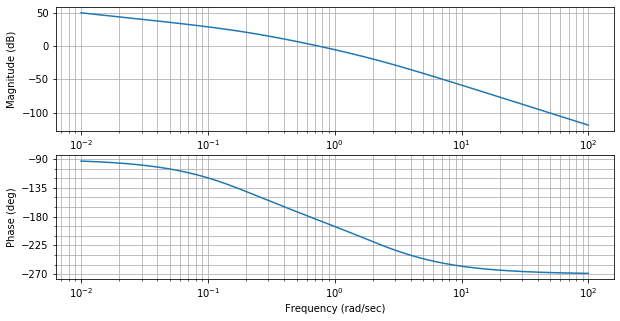

In [7]:
fig = plt.figure("Bode",figsize=(10,5))
ax = fig.subplots()
mag, w = rlf.getValues(Corr_PID_tI*G, -225, printValue=False, NameOfFigure="Bode")
tD = 10/w
display(Markdown(rf"Le point dont la phase vaut -225° a un module de {20*np.log10(mag):.0f} dB. Sa pulsation est de {w:.1f} rad/s et donc nous allons fixer {w:.1f}="r"$\frac{10}{\tau_D}$ soit ${\tau_D}$"rf"={tD:.3f} s."))

Le système ainsi corrigé présente une marge de phase de 45.97° et une marge de gain de inf dB.


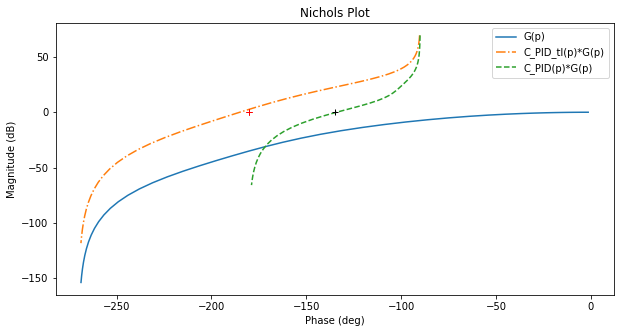

In [8]:
Corr_PID = Kp*tf([tD, 1],[1, 0])*tf([tI, 1], 1)

fig = plt.figure("Nichols",figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, grid = False, labels=['G(p)'], NameOfFigure = "Nichols")
rlf.nichols(Corr_PID_tI*G, grid = False, labels=['C_PID_tI(p)*G(p)'], NameOfFigure = "Nichols", linestyle = '-.')
rlf.nichols(Corr_PID*G, grid = False, labels=['C_PID(p)*G(p)'], NameOfFigure = "Nichols", linestyle = '--')

ax.plot(-180+MP, 0,'k+'); # Ajout du repère (+) par lequel on est censé passer

gm, pm, wg, wp = margin(Corr_PID*G) # Extrait la marge de gain (Gm) et de phase (Pm)
print(f"Le système ainsi corrigé présente une marge de phase de {pm:.2f}° et une marge de gain de {gm:.2f} dB.")

In [9]:
HTML('''<script>initialize();</script>Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.''')